In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the CSV into a Pandas DataFrame
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
numeric_col_data = df.select_dtypes(include=["number"])

In [10]:
numeric_col_data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [11]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<Axes: xlabel='Churn'>

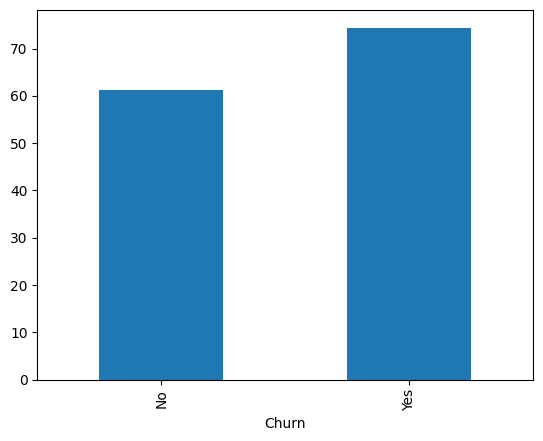

In [13]:
df.groupby("Churn")["MonthlyCharges"].mean().plot(kind="bar")


In [14]:
df.groupby(["Churn","gender"])["MonthlyCharges"].mean()


Churn  gender
No     Female    61.664908
       Male      60.876914
Yes    Female    74.812087
       Male      74.066989
Name: MonthlyCharges, dtype: float64

In [15]:
df.groupby("Churn")["tenure"].mean()


Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [16]:
df.groupby("Contract")["MonthlyCharges"].mean()


Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Binary encoding
binary_cols = ["TechSupport", "OnlineSecurity", "DeviceProtection"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "No internet service": 0})

# Step 2: One-hot encoding
df = pd.get_dummies(df, columns=["Contract", "InternetService"], drop_first=True)

# Step 3: Encode target variable
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Step 4: Define X and y (features and target)
X = df[[
    "Contract_One year", "Contract_Two year", 
    "InternetService_Fiber optic", "InternetService_No", 
    "TechSupport", "OnlineSecurity", "DeviceProtection", 
    "tenure", "MonthlyCharges"
]]
y = df["Churn"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, "Scaler.pkl")


['Scaler.pkl']

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

def modelperformance(prediction):
    print(f"Accuracy score on model is {accuracy_score(y_test, prediction)}")


Accuracy Score:  0.8077
Precision Score: 0.6723
Recall Score:    0.5335
F1 Score:        0.5949


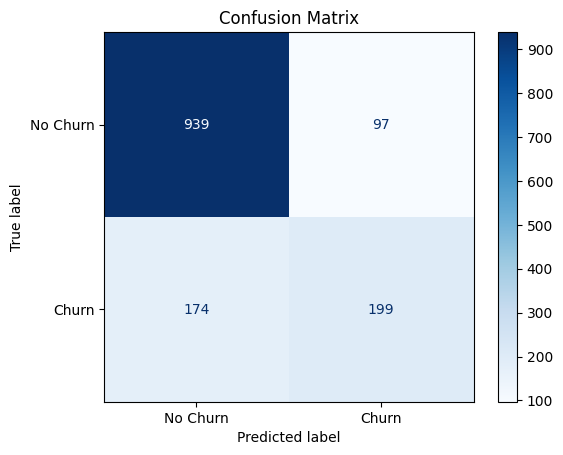

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_predict = log_model.predict(X_test)

# Evaluation function
def modelperformance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score:  {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score:    {rec:.4f}")
    print(f"F1 Score:        {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Call evaluation
modelperformance(y_test, y_predict)


Accuracy Score:  0.7729
Precision Score: 0.5911
Recall Score:    0.4611
F1 Score:        0.5181


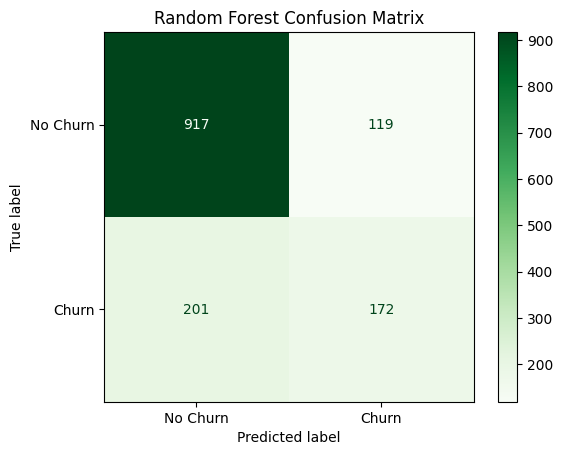

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation function
def model_performance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score:  {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score:    {rec:.4f}")
    print(f"F1 Score:        {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Greens)
    plt.title("Random Forest Confusion Matrix")
    plt.show()

# Call evaluation
model_performance(y_test, y_pred)


Accuracy Score:  0.8077
Precision Score: 0.7073
Recall Score:    0.4665
F1 Score:        0.5622


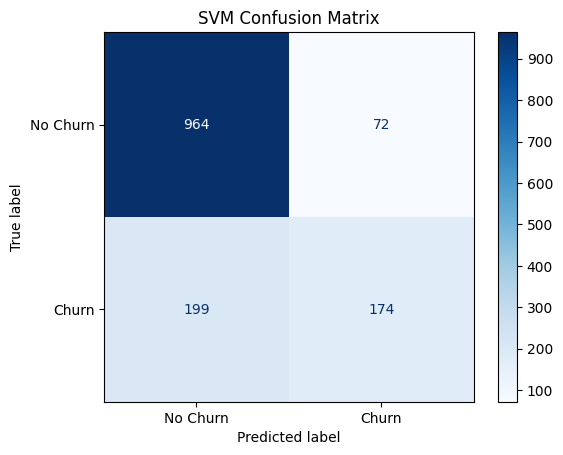

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluation function
def model_performance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score:  {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score:    {rec:.4f}")
    print(f"F1 Score:        {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("SVM Confusion Matrix")
    plt.show()

# Call evaluation
model_performance(y_test, y_pred)



📊 Decision Tree (Pruned + Balanced) Results:
Accuracy Score:  0.7622
Precision Score: 0.5354
Recall Score:    0.7694
F1 Score:        0.6315


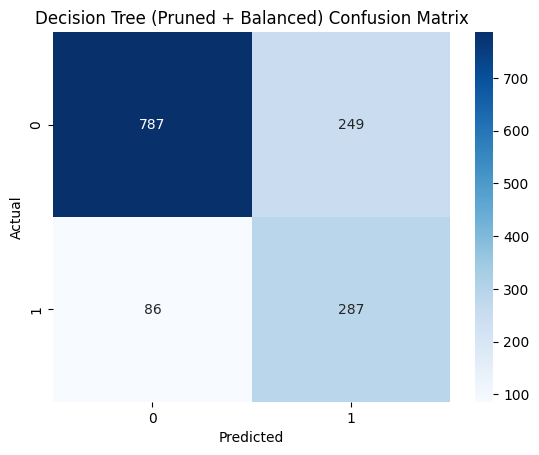

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Function to evaluate and visualize the model
def evaluate_model(name, y_test, y_pred):
    print(f"\n📊 {name} Results:")
    print("Accuracy Score: ", round(accuracy_score(y_test, y_pred), 4))
    print("Precision Score:", round(precision_score(y_test, y_pred), 4))
    print("Recall Score:   ", round(recall_score(y_test, y_pred), 4))
    print("F1 Score:       ", round(f1_score(y_test, y_pred), 4))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# 1️⃣ Pruned Decision Tree with Class Weights
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
evaluate_model("Decision Tree (Pruned + Balanced)", y_test, dt_pred)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), params, scoring='precision', cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Precision:", grid.best_score_)


Best Params: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Best Precision: 0.5082206861683455


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_rf_bal, y_train_rf_bal = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote_model.fit(X_train_rf_bal, y_train_rf_bal)

# Predict
rf_smote_pred = rf_smote_model.predict(X_test)


In [26]:
rf_weight_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_weight_model.fit(X_train, y_train)
rf_weight_pred = rf_weight_model.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Results:")
    print(f"Accuracy Score : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision Score: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall Score   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred):.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{name} Confusion Matrix")
    plt.show()



📊 Random Forest with SMOTE Results:
Accuracy Score : 0.7445
Precision Score: 0.5161
Recall Score   : 0.5576
F1 Score       : 0.5361


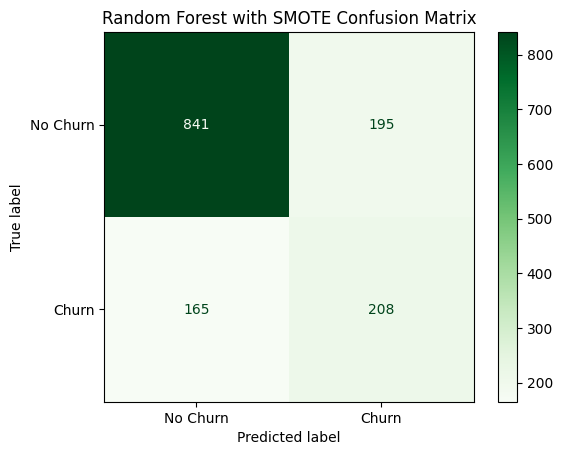


📊 Random Forest with class_weight Results:
Accuracy Score : 0.7771
Precision Score: 0.5993
Recall Score   : 0.4772
F1 Score       : 0.5313


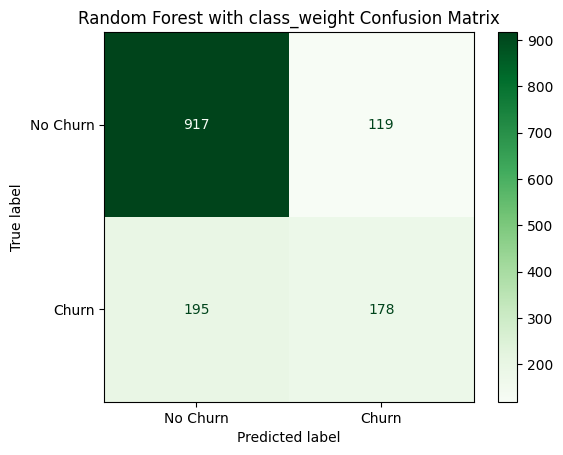

In [28]:
evaluate_model("Random Forest with SMOTE", y_test, rf_smote_pred)
evaluate_model("Random Forest with class_weight", y_test, rf_weight_pred)


In [29]:
import joblib

# Save the trained decision tree model
joblib.dump(dt_model, "model.pkl")

print("✅ Decision Tree model saved as model.pkl")


✅ Decision Tree model saved as model.pkl


In [30]:
from sklearn.preprocessing import StandardScaler
import joblib

# Example data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X is your feature data

# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']